In [118]:
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Data Preprocessing
Reading, processing and summarizing data

In [120]:
# Reading file and displaying first rows to see the structure of data - USD/PLN
inflation = pd.read_excel('../files/inflacja.xlsx', sheet_name = 0)
inflation.head()

,Nazwa zmiennej,Jednostka terytorialna,Sposób prezentacji,Rok,Miesiąc,Wartość,Flaga
0,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Grudzień poprzedniego roku = 100,2024,1,100.4,NaN
1,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Grudzień poprzedniego roku = 100,2024,2,100.7,NaN
2,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Grudzień poprzedniego roku = 100,2024,3,100.9,NaN
3,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Grudzień poprzedniego roku = 100,2024,4,NaN,NaN
4,Wskaźnik cen towarów i usług konsumpcyjnych,Polska,Grudzień poprzedniego roku = 100,2024,5,NaN,NaN


In [121]:
# Viewing columns and their datatypes
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nazwa zmiennej          2064 non-null   object 
 1   Jednostka terytorialna  2064 non-null   object 
 2   Sposób prezentacji      2064 non-null   object 
 3   Rok                     2064 non-null   int64  
 4   Miesiąc                 2064 non-null   int64  
 5   Wartość                 2019 non-null   float64
 6   Flaga                   48 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 113.0+ KB


In [122]:
# Reading file and displaying first rows to see the structure of data - unemployment
unemployment = pd.read_excel('../files/general_unemployment.xlsx', sheet_name = 1)
unemployment.head()

,Kod,Nazwa,Miesiące,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,2011,2104986,osoba,
1,0,POLSKA,styczeń,ogółem,2012,2121518,osoba,
2,0,POLSKA,styczeń,ogółem,2013,2295744,osoba,
3,0,POLSKA,styczeń,ogółem,2014,2260662,osoba,
4,0,POLSKA,styczeń,ogółem,2015,1918599,osoba,


In [123]:
# Viewing columns and their datatypes
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              504 non-null    int64 
 1   Nazwa            504 non-null    object
 2   Miesiące         504 non-null    object
 3   Płeć             504 non-null    object
 4   Rok              504 non-null    int64 
 5   Wartosc          504 non-null    object
 6   Jednostka miary  504 non-null    object
 7   Atrybut          504 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


In [124]:
# Cleaning up data - drop  irrelevant columns
inflation.drop(['Nazwa zmiennej', 'Jednostka terytorialna', 'Flaga'], axis = 1, inplace = True)
inflation.rename(columns={'Sposób prezentacji': 'Rodzaj'}, inplace=True)
inflation.head()

,Rodzaj,Rok,Miesiąc,Wartość
0,Grudzień poprzedniego roku = 100,2024,1,100.4
1,Grudzień poprzedniego roku = 100,2024,2,100.7
2,Grudzień poprzedniego roku = 100,2024,3,100.9
3,Grudzień poprzedniego roku = 100,2024,4,NaN
4,Grudzień poprzedniego roku = 100,2024,5,NaN


In [125]:
# Preparing month map to create date column
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [126]:
# Applying month map and creating date column
inflation = inflation[inflation["Rodzaj"] == "Analogiczny miesiąc poprzedniego roku = 100"]
inflation = inflation.dropna(subset=["Wartość"])
inflation = inflation[inflation["Rok"] >= 2011]
inflation['Month'] = inflation['Miesiąc']
inflation.rename(columns = {'Rok' : 'Year'}, inplace = True)
inflation['Data'] = pd.to_datetime(inflation[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
inflation['Inflacja'] = round(inflation['Wartość'].astype(float) - 100, 2)
inflation.drop(columns=["Wartość"])
inflation.head()

,Rodzaj,Year,Miesiąc,Wartość,Month,Data,Inflacja
24,Analogiczny miesiąc poprzedniego roku = 100,2024,1,103.7,1,2024-01-01,3.7
25,Analogiczny miesiąc poprzedniego roku = 100,2024,2,102.8,2,2024-02-01,2.8
26,Analogiczny miesiąc poprzedniego roku = 100,2024,3,102.0,3,2024-03-01,2.0
84,Analogiczny miesiąc poprzedniego roku = 100,2023,1,116.6,1,2023-01-01,16.6
85,Analogiczny miesiąc poprzedniego roku = 100,2023,2,118.4,2,2023-02-01,18.4


In [127]:
# Cleaning up data - drop null data and irrelevant columns
unemployment = unemployment[unemployment['Atrybut'] != 'n']
unemployment.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
unemployment.rename(columns={'Wartosc': 'Osoby'}, inplace=True)
unemployment.head()

,Miesiące,Płeć,Rok,Osoby
0,styczeń,ogółem,2011,2104986
1,styczeń,ogółem,2012,2121518
2,styczeń,ogółem,2013,2295744
3,styczeń,ogółem,2014,2260662
4,styczeń,ogółem,2015,1918599


In [128]:
# Applying month map and creating date column
unemployment['Month'] = unemployment['Miesiące'].map(month_mapping)
unemployment.rename(columns = {'Rok' : 'Year'}, inplace = True)
unemployment['Data'] = pd.to_datetime(unemployment[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
unemployment['Osoby'] = unemployment['Osoby'].astype(int)
unemployment.head()

,Miesiące,Płeć,Year,Osoby,Month,Data
0,styczeń,ogółem,2011,2104986,1,2011-01-01
1,styczeń,ogółem,2012,2121518,1,2012-01-01
2,styczeń,ogółem,2013,2295744,1,2013-01-01
3,styczeń,ogółem,2014,2260662,1,2014-01-01
4,styczeń,ogółem,2015,1918599,1,2015-01-01


## Exploratory Data Analysis (EDA)

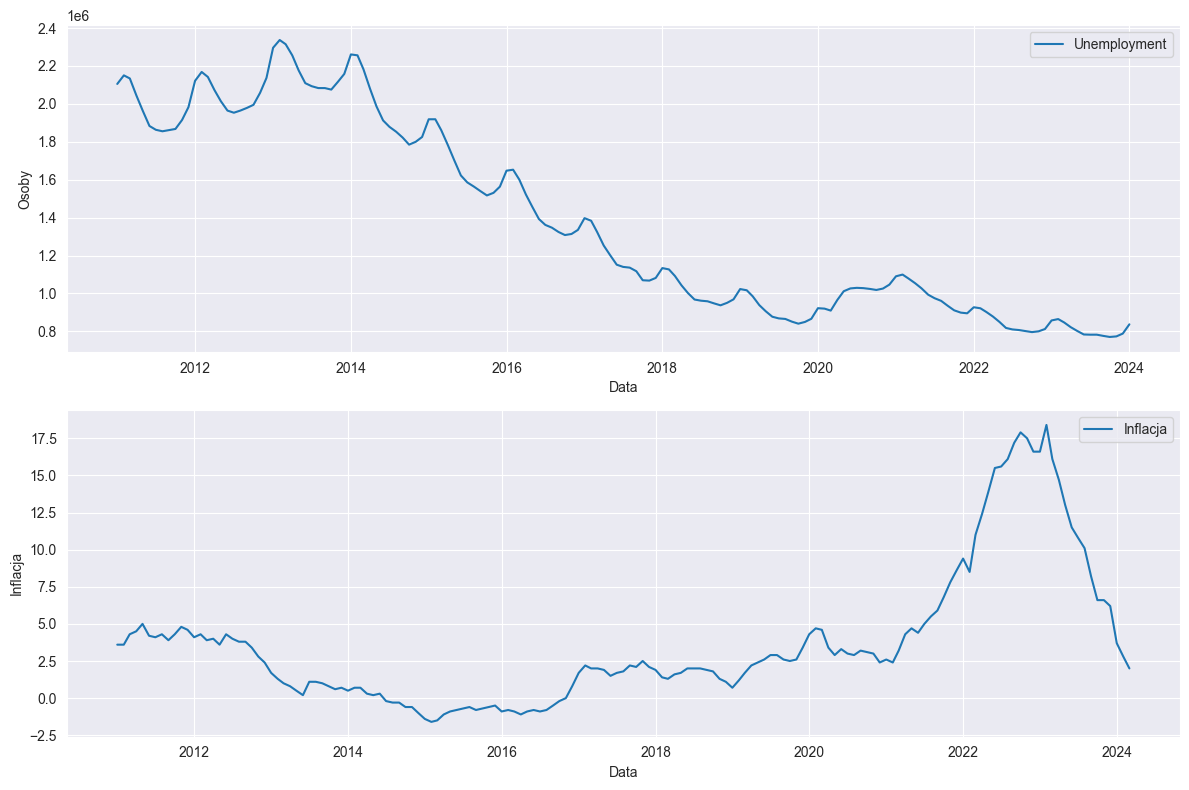

In [129]:
fig = plt.figure(figsize = [12,8])

plt.subplot(2, 1, 1)
sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)

plt.subplot(2, 1, 2)
sns.lineplot(
    x="Data",
    y="Inflacja",
    data=inflation,
    label="Inflacja"
)
plt.xlabel("Data")
plt.tight_layout()

plt.legend()

plt.show()

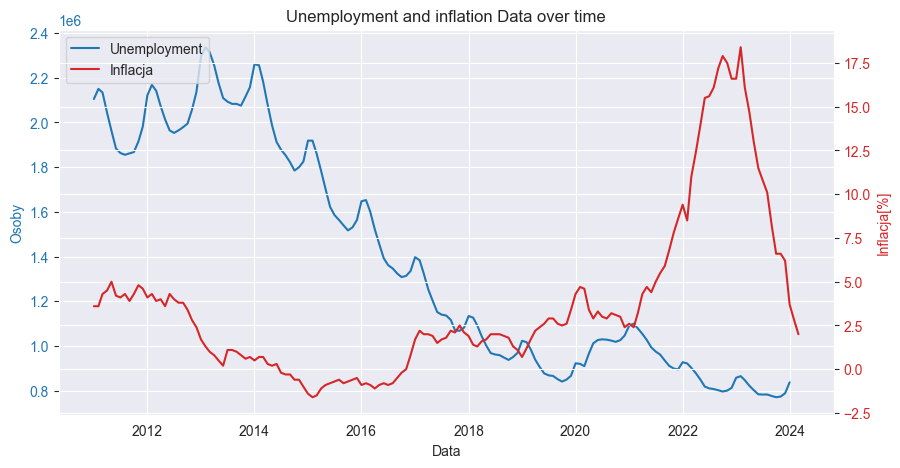

In [130]:
plt.figure(figsize=(10, 5))

# Unemployment data
ax1 = sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)
ax1.set_xlabel("Data")
ax1.set_ylabel("Osoby", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Currency data
ax2 = ax1.twinx()
sns.lineplot(
    x="Data",
    y="Inflacja",
    data=inflation,
    ax=ax2,
    color='tab:red',
    label="Inflacja"
)
ax2.set_ylabel("Inflacja[%]", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combining legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Removing duplicate legend
ax2.get_legend().remove()

plt.title("Unemployment and inflation Data over time")
plt.show()

In [131]:
inflation.set_index('Data', inplace=True)
inflation['Inflacja'].to_csv('../files/inflationmod.csv')